In [1]:
from netCDF4 import Dataset, date2num, num2date
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [11]:
lat = 5 
lon = -170

if lat < 0:
    latUnit = 'S'
else:
    latUnit = 'N'

if lon < 0:
    lonUnit = 'W'
else:
    lonUnit = 'E'

lat = abs(lat)
lon = abs(lon)

myID = f'{lat}{latUnit}_{lon}{lonUnit}'
larrID = f'{lat}{latUnit.lower()}{lon}{lonUnit.lower()}'

myQSfile = glob(f'../../downloads/QS_data/T_{myID}_QS_*.nc')[0]
larryQSfile = f'../../downloads/larryNielData/larry2020/EXP11/fromLarry_{larrID}_data.nc'

mDS = Dataset(myQSfile)
lDS = Dataset(larryQSfile)

cdfTime = mDS.variables['time']
timeUnit = cdfTime.units
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit)
myTime = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) for dtm in cftimes]


mWspd = np.array(mDS.variables['wspd'])
mWdir = np.array(mDS.variables['wdir'])
mWspd[abs(mWspd) > 1000] = float('nan')


cdfTime = lDS.variables['time']
timeUnit = 'days since 0001-01-01 00:00:0.0'
timeArr = np.array(cdfTime)
cftimes=num2date(timeArr, timeUnit, has_year_zero=True)
larryTime = [datetime(dtm.year, dtm.month, dtm.day, dtm.hour, dtm.minute, dtm.second) - timedelta(365) for dtm in cftimes]

lWspd = np.array(lDS.variables['sat_wspd10n'])
u = np.array(lDS.variables['sat_u10n'])
v = np.array(lDS.variables['sat_v10n'])

lWdir = np.arctan2(v,u)%360

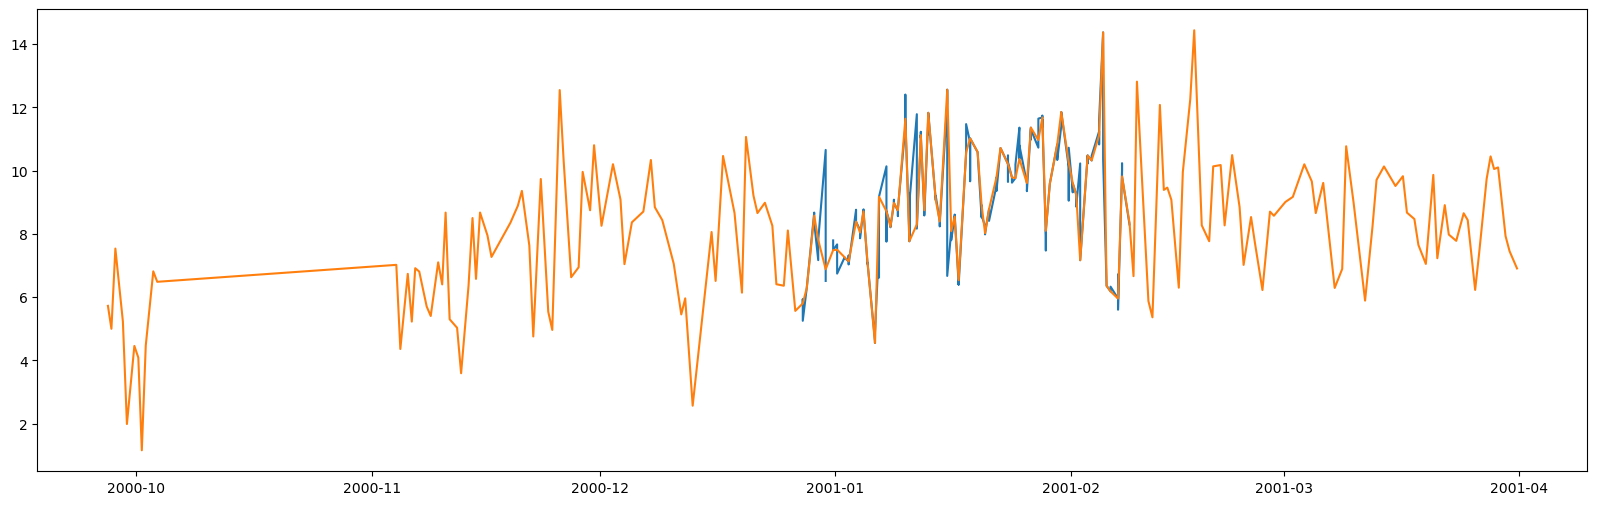

In [18]:
plt.figure(figsize = (20,6))
plt.plot(myTime[1500:1700], mWspd[1500:1700])
plt.plot(larryTime[100:300], lWspd[100:300])

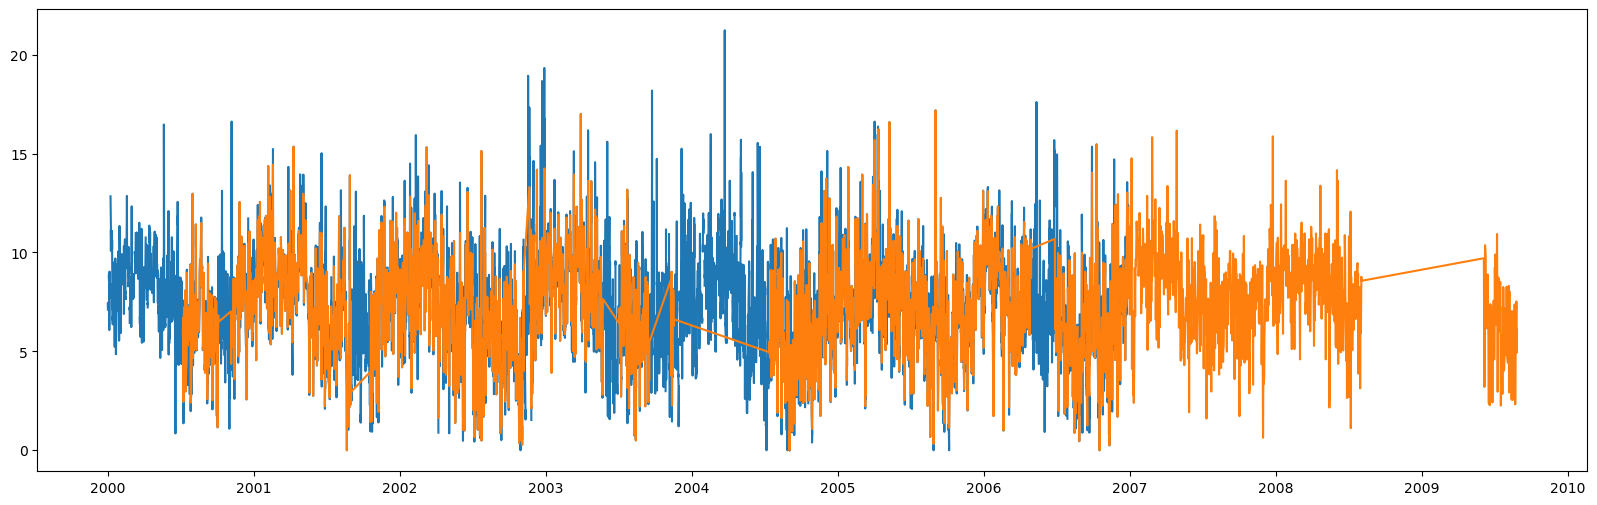

In [13]:
plt.figure(figsize = (20,6))
plt.plot(myTime, mWspd)
plt.plot(larryTime, lWspd)

In [5]:
timeUnit

'days since 0001-01-01 00:00:0.0'